In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import urllib.request
import os

In [2]:
# Step 1: Download the dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00320/student.zip"
zip_file_path = "student.zip"
download_dir = "student_data"

print("Downloading Student Performance dataset...")
urllib.request.urlretrieve(url, zip_file_path)
print("Download complete!")

print("Extracting dataset...")
import zipfile
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(download_dir)
print("Dataset extracted!")

# Load the dataset
data_path = os.path.join(download_dir, "student-mat.csv")
df = pd.read_csv(data_path, sep=";")

Download complete!
Extracting dataset...
Dataset extracted!


In [3]:
df.describe()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
count,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000,395.000000
mean,16.696203,2.749367,2.521519,1.448101,2.035443,0.334177,3.944304,3.235443,3.108861,1.481013,2.291139,3.554430,5.708861,10.908861,10.713924,10.415190
std,1.276043,1.094735,1.088201,0.697505,0.839240,0.743651,0.896659,0.998862,1.113278,0.890741,1.287897,1.390303,8.003096,3.319195,3.761505,4.581443
min,15.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,3.000000,0.000000,0.000000
25%,16.000000,2.000000,2.000000,1.000000,1.000000,0.000000,4.000000,3.000000,2.000000,1.000000,1.000000,3.000000,0.000000,8.000000,9.000000,8.000000
50%,17.000000,3.000000,2.000000,1.000000,2.000000,0.000000,4.000000,3.000000,3.000000,1.000000,2.000000,4.000000,4.000000,11.000000,11.000000,11.000000
75%,18.000000,4.000000,3.000000,2.000000,2.000000,0.000000,5.000000,4.000000,4.000000,2.000000,3.000000,5.000000,8.000000,13.000000,13.000000,14.000000
max,22.000000,4.000000,4.000000,4.000000,4.000000,3.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,75.000000,19.000000,19.000000,20.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      395 non-null    object
 1   sex         395 non-null    object
 2   age         395 non-null    int64 
 3   address     395 non-null    object
 4   famsize     395 non-null    object
 5   Pstatus     395 non-null    object
 6   Medu        395 non-null    int64 
 7   Fedu        395 non-null    int64 
 8   Mjob        395 non-null    object
 9   Fjob        395 non-null    object
 10  reason      395 non-null    object
 11  guardian    395 non-null    object
 12  traveltime  395 non-null    int64 
 13  studytime   395 non-null    int64 
 14  failures    395 non-null    int64 
 15  schoolsup   395 non-null    object
 16  famsup      395 non-null    object
 17  paid        395 non-null    object
 18  activities  395 non-null    object
 19  nursery     395 non-null    object
 20  higher    

In [5]:
# Step 2: Data Preprocessing
# Adding binary target variable (Pass/Fail based on G3)
df['Pass'] = df['G3'].apply(lambda x: 1 if x >= 10 else 0)  # 10 is the passing grade
df.drop(columns=['G3'], inplace=True)


In [6]:
# Encoding categorical variables
categorical_columns = df.select_dtypes(include=['object']).columns
label_encoders = {}
for col in categorical_columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [7]:
# Splitting features and target
X = df.drop(columns=['Pass'])
y = df['Pass']


In [8]:
# Scaling numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Splitting into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [9]:
# Step 3: Implement Gradient Boosting Classifier
gbc = GradientBoostingClassifier(random_state=42, n_estimators=100, max_depth=3, learning_rate=0.1)
gbc.fit(X_train, y_train)


GradientBoostingClassifier(random_state=42)

In [10]:
# Predictions
y_pred = gbc.predict(X_test)


# Step 4: Model Evaluation
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79



Confusion Matrix:


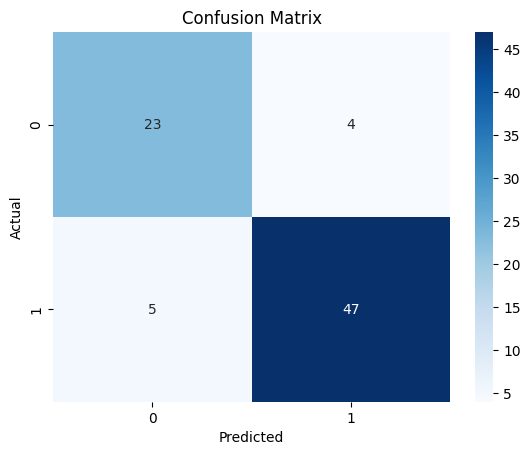

In [11]:
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [12]:
# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 88.61%


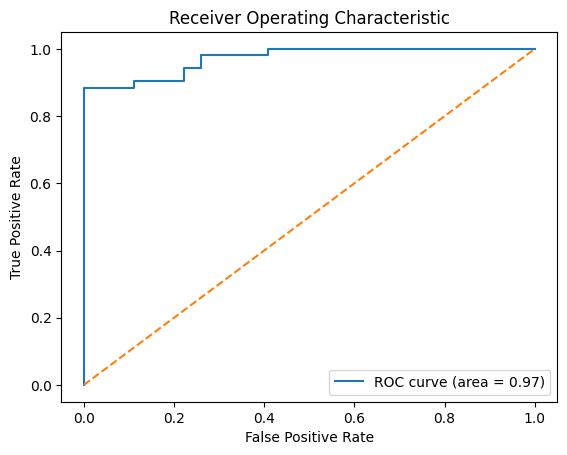

In [13]:
# ROC Curve
y_prob = gbc.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, label=f"ROC curve (area = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic")
plt.legend(loc="lower right")
plt.show()

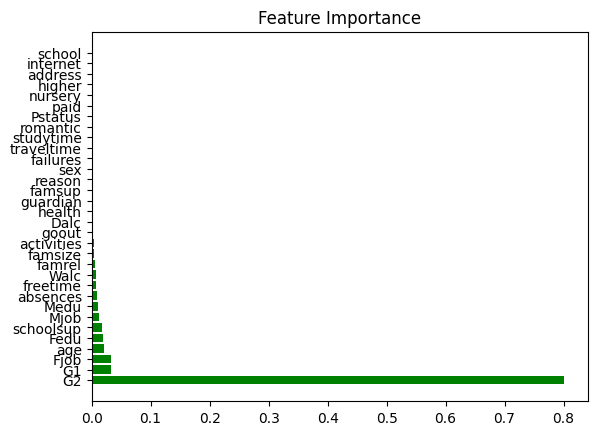

In [14]:
# Step 5: Feature Importance
feature_importances = gbc.feature_importances_
sorted_idx = np.argsort(feature_importances)[::-1]
plt.barh([X.columns[i] for i in sorted_idx], feature_importances[sorted_idx], color="green")
plt.title("Feature Importance")
plt.show()


In [15]:
# Step 6: Hyperparameter Tuning with GridSearchCV
param_grid = {
    "n_estimators": [50, 100, 150],
    "max_depth": [3, 4, 5],
    "learning_rate": [0.05, 0.1, 0.2],
}

grid_search = GridSearchCV(GradientBoostingClassifier(random_state=42), param_grid, cv=5, scoring="accuracy")
grid_search.fit(X_train, y_train)
print(f"Best Parameters: {grid_search.best_params_}")


Best Parameters: {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}


In [16]:
# Final Model with Tuned Parameters
final_model = grid_search.best_estimator_
y_pred_tuned = final_model.predict(X_test)

# Final Evaluation
print("\nFinal Model Classification Report:")
print(classification_report(y_test, y_pred_tuned))
final_accuracy = accuracy_score(y_test, y_pred_tuned)
print(f"Final Model Accuracy: {final_accuracy * 100:.2f}%")


Final Model Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        27
           1       0.92      0.90      0.91        52

    accuracy                           0.89        79
   macro avg       0.87      0.88      0.87        79
weighted avg       0.89      0.89      0.89        79

Final Model Accuracy: 88.61%
